<h1>PCS Data Science Workshop</h1>

Welcome to the PCS Data Science Workshop! This notebook will provide a brief overview of numerous data science techniques, many of which is covered in Data C100 (highly recommend) including
* `Python`
* `Numpy` and Vector Operations
* `pandas`, EDA, and Data Manipulation
* Visualization (`Matplotlib/Seaborn`)
* Multilinear Modeling, Data Engineering, Gradient Descent, and `Scikit-Learn`

#### First, Let's do Some Top Level Imports

In [21]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import plotly.express as px
import plotly.graph_objects
import seaborn as sns
import matplotlib.pyplot as plt

# Data Training
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Other things you may need
import os
import asyncio
import aiohttp
import time

# Turning warnings off
import warnings
warnings.simplefilter("ignore")

# Python

Python is the (arguably) the most important language used for data science, and most of the low level work you do will be in the Jupyter environment (which was developed by Cal's own professor, Fernando Perez!)

Here are some important concepts to know

### Lambda functions

In [3]:
# A function which returns x squared
lambda x: x ** 2

# A function which determines if a string has the word "at"
lambda x: "at" in x

# A function which finds if the percent of people who have a disability is greater than 20%
lambda x: (x["Disability"] / x["Total Population"]) > 0.2;

### Iteration

In [4]:
lst1 = ["hello", "this", "is"]
lst2 = ["a", "great", "workshop"]

# A for loop counter
for i in range(len(lst1)):
    print(lst1[i])

# A for each loop
for word in lst2:
    print(word)

hello
this
is
a
great
workshop


### List comprehensions

In [12]:
# Checks if the words in list 1 and 2 have a length greater than 4
[len(word) > 4 for word in lst1 + lst2]

[True, False, False, False, True, True]

# Vectorized Operations

In [22]:
def current_time():
    return int(time.time() * 1000)  # Get current time in milliseconds

When manipulating large amounts of data, it becomes slower and slower to iterate through every value to transform it... let's do a test

In [18]:
for length in [10, 1000, 100000, 1000000, 10000000]:
    t = current_time()
    result = [x ** 2 + 1 for x in range(length)]
    elapsed_time = current_time() - t
    print(f"Iterating through {length} values took {elapsed_time} milliseconds")

Iterating through 10 values took 12 milliseconds
Iterating through 1000 values took 1 milliseconds
Iterating through 100000 values took 23 milliseconds
Iterating through 1000000 values took 228 milliseconds
Iterating through 10000000 values took 2179 milliseconds


To solve this, we can "vectorize" our operations using libraries like `Numpy` and `pandas`, which takes advantage of parallelism/multithreading to efficiently apply operations to large quantities of data

In [19]:
for length in [10, 1000, 100000, 1000000, 10000000]:
    t = current_time()
    result = np.arange(length) ** 2
    elapsed_time = current_time() - t
    print(f"Iterating through {length} values took {elapsed_time} milliseconds")

Iterating through 10 values took 124 milliseconds
Iterating through 1000 values took 0 milliseconds
Iterating through 100000 values took 0 milliseconds
Iterating through 1000000 values took 3 milliseconds
Iterating through 10000000 values took 22 milliseconds


As you can see, vectorized operations may be slower at first, but are significantly more efficienct when operating on millions of values

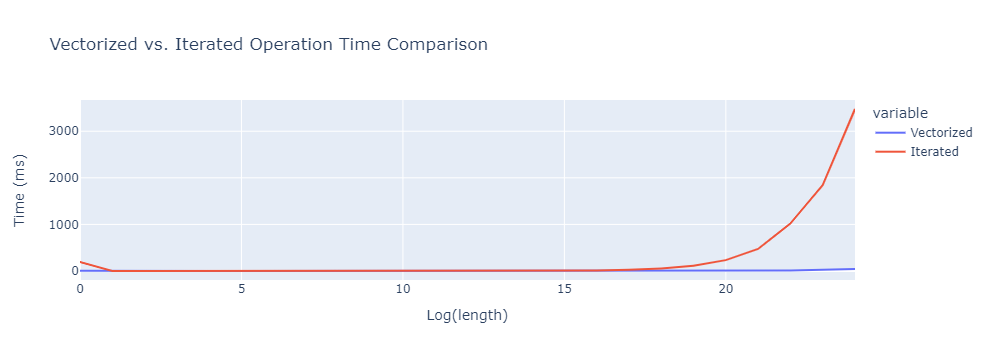

In [31]:
# Create an empty DataFrame to store the times
vectorized_vs_iterated = pd.DataFrame({"Log (length)": [], "Vectorized": [], "Iterated": []})

for length in np.arange(25):
    
    # Vectorized Operation Time
    t = current_time()
    vectorized_result = np.arange(2 ** length) ** 2 + 5
    vectorized_time = current_time() - t

    # Iterated Operation Time
    t = current_time()
    iterated_result = [x ** 2 + 5 for x in range(2 ** length)]
    iterated_time = current_time() - t

    vectorized_vs_iterated = vectorized_vs_iterated.append({"Log (length)": length, "Vectorized": vectorized_time, "Iterated": iterated_time}, ignore_index=True)

# Create a line plot using Plotly
fig = px.line(vectorized_vs_iterated, x="Log (length)", y=["Vectorized", "Iterated"], labels={"Log (length)": "Log(length)", "value": "Time (ms)"}, title="Vectorized vs. Iterated Operation Time Comparison")
fig.show()

### How Vectorized Operations Actually Work

Using `Numpy`, we can create an `array` and apply functions directly to them like a string or number. In `pandas`, a `Series` will do the trick

In [37]:
# Using iteration
python_list = range(5)
print(f"Python List Squared: {[x ** 2 for x in python_list]}")

# Using numpy arrays
numpy_array = np.arange(5)
# (Alternatively, you could run numpy_array = np.array(python_list) to turn a list into an array
print(f"Numpy Array Squared: {numpy_array ** 2}")

# Using pandas Series
pandas_series = pd.Series(range(5))
print(f"Pandas Series Squared: \n{pandas_series ** 2}");

# As you can see, both the series and the array have vectorized operations

Python List Squared: [0, 1, 4, 9, 16]
Numpy Array Squared: [ 0  1  4  9 16]
Pandas Series Squared: 
0     0
1     1
2     4
3     9
4    16
dtype: int64


If we want to slice a list of strings

In [38]:
pandas_series_str = pd.Series(["Hello", "I", "Will", "Be", "Sliced"])
pandas_series_str.str[0]

0    H
1    I
2    W
3    B
4    S
dtype: object

If we want to find the ones with length greater than 5

In [41]:
pandas_series_str.str.len() > 5

0    False
1    False
2    False
3    False
4     True
dtype: bool

This will be very useful for later when it comes to EDA

If you don't know how to do an operation, look at the documentation for these types of things:

[pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

[pandas.Series.str](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html)

[Numpy.Array](https://numpy.org/doc/stable/reference/arrays.html)